## classifcation

### decision tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
from io import StringIO
dataset =StringIO('''Plays Fetch,Is grumpy,Favorite food,Species
Yes,No,Bacon,Dog
No,Yes,Dog Food,Dog
No,Yes,Cat food,Cat
No,Yes,Bacon,Cat
No,No,Cat food,Cat
No,Yes,Bacon,Cat
No,Yes,Cat food,Cat
No,No,Dog Food,Dog
No,Yes,Cat food,Cat
Yes,No,Dog Food,Dog
Yes,No,Bacon,Dog
No,No,Cat food,Cat
Yes,Yes,Cat food,Cat
Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)
df

,Plays Fetch,Is grumpy,Favorite food,Species
0,Yes,No,Bacon,Dog
1,No,Yes,Dog Food,Dog
2,No,Yes,Cat food,Cat
3,No,Yes,Bacon,Cat
4,No,No,Cat food,Cat
5,No,Yes,Bacon,Cat
6,No,Yes,Cat food,Cat
7,No,No,Dog Food,Dog
8,No,Yes,Cat food,Cat
9,Yes,No,Dog Food,Dog


In [4]:
df['B plays']=df['Plays Fetch'].apply(lambda x:x=='Yes')
df['B grumpy']=df['Is grumpy'].apply(lambda x:x=='Yes')
df['b food']=[(0 if food=='Bacon' else 1 if food=='Dog Food' else 2) for food in df['Favorite food']]
df

,Plays Fetch,Is grumpy,Favorite food,Species,B plays,B grumpy,b food
0,Yes,No,Bacon,Dog,True,False,0
1,No,Yes,Dog Food,Dog,False,True,1
2,No,Yes,Cat food,Cat,False,True,2
3,No,Yes,Bacon,Cat,False,True,0
4,No,No,Cat food,Cat,False,False,2
5,No,Yes,Bacon,Cat,False,True,0
6,No,Yes,Cat food,Cat,False,True,2
7,No,No,Dog Food,Dog,False,False,1
8,No,Yes,Cat food,Cat,False,True,2
9,Yes,No,Dog Food,Dog,True,False,1


In [5]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree=decisiontree.fit(df[['B plays','B grumpy','b food']],df['Species'])

In [6]:
print('extracted classes ',decisiontree.classes_)

extracted classes  ['Cat' 'Dog']


In [7]:
obtained_tree.predict([[True,False,0]])

array(['Dog'], dtype=object)

In [8]:
obtained_tree.predict([[False,True,1]])

array(['Dog'], dtype=object)

In [9]:
prediction=obtained_tree.predict(df[['B plays','B grumpy','b food']])
print(prediction.tolist())

['Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog']


In [10]:
actual=df['Species']
print(actual.tolist())

['Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog']


In [12]:
print(confusion_matrix(actual,prediction))

[[8 0]
 [0 6]]


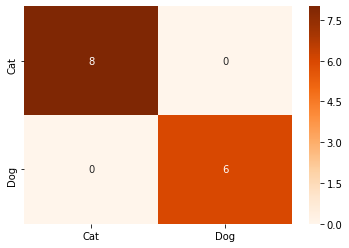

In [18]:
import seaborn
seaborn.heatmap(confusion_matrix(actual,prediction),annot=True,cmap="Oranges",xticklabels=decisiontree.classes_
               ,yticklabels=decisiontree.classes_)

In [19]:
print(classification_report(df['Species'],prediction))

              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00         8
         Dog       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



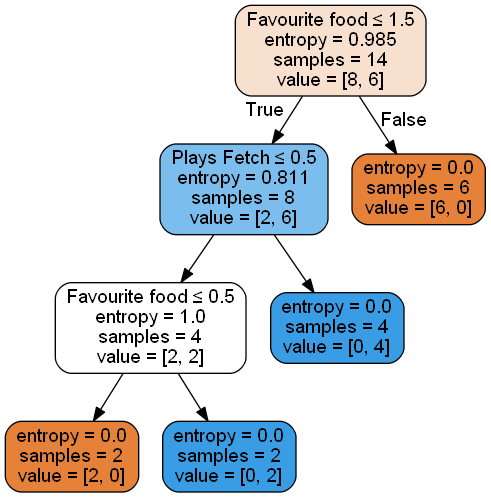

In [21]:
import os
os.environ['Path']+=os.pathsep+'C://Program Files (x86)\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=['Plays Fetch','Is grumpy'
                                                                                              ,'Favourite food'],
               special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())